<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/intro-Machine-Learning/blob/main/classes/class_18/class_18_pipeline_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table> 

# Clase 18 

Pasos para creación del cuaderno interactivo.

1. Plantear bien la pregunta.  

   * ¿Regresión o clasificación?
   * ¿Tipo de regresión y tipo de clasificación?

2. Exploración inicial.
   * Indicar la fuente de dónde se toman los datos.
   * Hacer explícita la función objetivo.
   * Decir cuáles son los atributos (descripción breve de cada uno)
   * Practicar una primera s´ntesis tabular y una exploración gráfica de los datos.
   
3. Preparar los datos para los algoritmos de aprendizaje.

   * Explorar correlaciones lineales con la variable objetivo.
   * Eliminar de ser necesario atributos que no sean de mucha utilidad.
   * Hacer separación inicial de datos para entrenar y para testear.
   * Limpiar datos y llenar datos faltantes.
   * Estandarizar los datos.
   * Crear funciones en Python de manera que se puedan replicar los procesos de transformación de datos en proyectos nuevos.   

In [1]:
import pandas as pd 
v = pd.read_csv('vivienda.csv')

In [2]:
v.head()

,longitud,latitud,antiguedad,habitaciones,dormitorios,población,hogares,ingresos,proximidad,valor
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,342200.0


# Sintesis de la información

In [3]:
v.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   longitud      20640 non-null  float64
 1   latitud       20640 non-null  float64
 2   antiguedad    20640 non-null  float64
 3   habitaciones  20640 non-null  float64
 4   dormitorios   20433 non-null  float64
 5   población     20640 non-null  float64
 6   hogares       20640 non-null  float64
 7   ingresos      20640 non-null  float64
 8   proximidad    20640 non-null  object 
 9   valor         20640 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
v.proximidad.value_counts() 

In [ ]:
v.describe() 

# Visualizaciones 

In [ ]:
v.hist(figsize = (15,10)) 

In [ ]:
v.plot(kind = 'scatter', x = 'longitud', y = 'latitud', alpha = 1, figsize = (10,6)) 

In [ ]:
v.plot(kind = 'scatter', x = 'longitud', y = 'latitud', alpha = 0.1, figsize = (10,6)) 

In [ ]:
import matplotlib.pyplot as plt 

v.plot(kind = 'scatter', x = 'longitud', y = 'latitud', alpha = 0.1, figsize = (10,6),\
      s = v.población/100, label = 'Población', \
      c = 'valor', cmap = plt.get_cmap('jet'), colorbar = True)  

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
v_train, v_test = train_test_split(v, test_size = 0.2, random_state = 42) 

In [6]:
v = v_train 

# Buscando correlaciones

Dado que el conjunto de datos no es demasiado grande, puede calcular fácilmente el coeficiente de correlación estándar (también llamado r de Pearson) entre cada par de atributos usando el método `corr()`:

In [7]:
v.corr() 

,longitud,latitud,antiguedad,habitaciones,dormitorios,población,hogares,ingresos,valor
longitud,1.000000,-0.924485,-0.101818,0.038676,0.063064,0.094276,0.049306,-0.017040,-0.046349
latitud,-0.924485,1.000000,0.005296,-0.029224,-0.059998,-0.102499,-0.064061,-0.076571,-0.142983
antiguedad,-0.101818,0.005296,1.000000,-0.360922,-0.320624,-0.292283,-0.302796,-0.121711,0.103706
habitaciones,0.038676,-0.029224,-0.360922,1.000000,0.930489,0.857936,0.920482,0.198268,0.133989
dormitorios,0.063064,-0.059998,-0.320624,0.930489,1.000000,0.878932,0.980255,-0.009141,0.047980
población,0.094276,-0.102499,-0.292283,0.857936,0.878932,1.000000,0.907452,0.004122,-0.026032
hogares,0.049306,-0.064061,-0.302796,0.920482,0.980255,0.907452,1.000000,0.012776,0.063714
ingresos,-0.017040,-0.076571,-0.121711,0.198268,-0.009141,0.004122,0.012776,1.000000,0.690647
valor,-0.046349,-0.142983,0.103706,0.133989,0.047980,-0.026032,0.063714,0.690647,1.000000


Ahora veamos cómo cada atributo está correlacionado con la variable objetivo de valor promedio de vivienda por distrito: 

In [8]:
v.corr().valor.sort_values(ascending = False) 

valor           1.000000
ingresos        0.690647
habitaciones    0.133989
antiguedad      0.103706
hogares         0.063714
dormitorios     0.047980
población      -0.026032
longitud       -0.046349
latitud        -0.142983
Name: valor, dtype: float64

El coeficiente de correlación varía de –1 a 1.

Cuando es cercano a 1, significa que existe una fuerte correlación positiva; por ejemplo, el valor medio de la vivienda tiende a aumentar cuando aumenta el ingreso medio.

Cuando el coeficiente es cercano a –1, significa que existe una fuerte correlación negativa; puede ver una pequeña correlación negativa entre la latitud y el valor medio de la vivienda (es decir, los precios tienen una ligera tendencia a bajar cuando va hacia el norte).

Finalmente, los coeficientes cercanos a 0 significan que no existe una correlación lineal. 

La siguiente figura muestra varios gráficos junto con el coeficiente de correlación entre sus ejes horizontal y vertical.

<img src = 'https://github.com/marco-canas/intro-Machine-Learning/blob/main/classes/class_17_/coeficientes_de_correlaci%C3%B3n_est%C3%A1ndar.png?raw=true'>

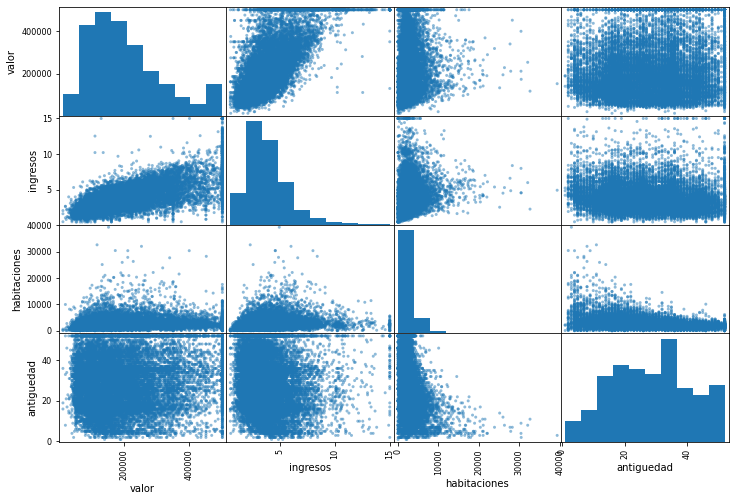

In [12]:
import matplotlib.pyplot as plt 

from pandas.plotting import scatter_matrix
attributes = ['valor', 'ingresos', 'habitaciones','antiguedad'] 
scatter_matrix(v[attributes], figsize=(12, 8))

plt.show() 

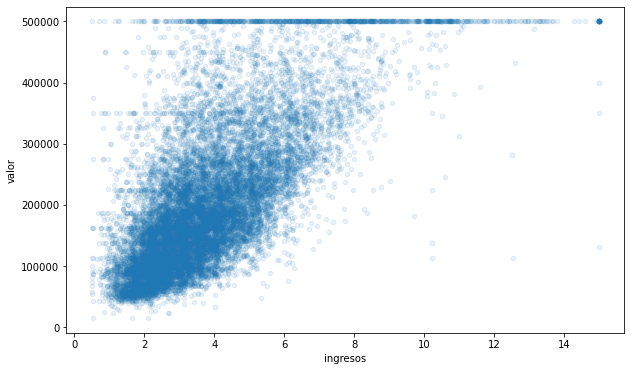

In [14]:
v.plot(kind="scatter", x='ingresos', y='valor', alpha=0.1, figsize = (10,6))

plt.show() 

Esta trama revela algunas cosas.

Primero, la correlación es de hecho muy fuerte; se puede ver claramente la tendencia al alza, y los puntos no están demasiado dispersos.

En segundo lugar, el límite de precio que notamos anteriormente es claramente visible como una línea horizontal en $500,000.

Pero este gráfico revela otras líneas rectas menos obvias: una línea horizontal alrededor de $450 000, otra alrededor de $350 000, quizás una alrededor de $280 000 y algunas más por debajo de esa. Es posible que desee intentar eliminar los distritos correspondientes para evitar que sus algoritmos aprendan a reproducir estas peculiaridades de los datos.

## Experimentando con combinaciones de atributos

Con suerte, las secciones anteriores le dieron una idea de algunas formas en que puede explorar los datos y obtener información.

Identificó algunas peculiaridades de los datos que quizás desee limpiar antes de enviar los datos a un algoritmo de aprendizaje automático y encontró correlaciones interesantes entre los atributos, en particular con el atributo objetivo.

Una última cosa que quizás desee hacer antes de preparar los datos para los algoritmos de Machine Learning es probar varias combinaciones de atributos.

Por ejemplo, el número total de habitaciones en un distrito no es muy útil si no sabe cuántos hogares hay.

Lo que realmente desea es el número de **habitaciones por hogar**. 

Del mismo modo, el número total de dormitorios por sí solo no es muy útil: probablemente quieras compararlo con el número de habitaciones.

Y la población por hogar también parece una combinación de atributos interesante para observar.

Vamos a crear estos nuevos atributos:

In [15]:
v['habitaciones_por_hogar'] = v.habitaciones/v.hogares 

In [16]:
v['dormitorios_por_habitación'] = v.dormitorios/v.habitaciones 

In [17]:
v['población_por_hogar'] = v.población/v.hogares 

Ahora veamos las correlaciones de nuevo: 

In [18]:
v.corr().valor.sort_values(ascending = False) 

valor                         1.000000
ingresos                      0.690647
habitaciones_por_hogar        0.158485
habitaciones                  0.133989
antiguedad                    0.103706
hogares                       0.063714
dormitorios                   0.047980
población_por_hogar          -0.022030
población                    -0.026032
longitud                     -0.046349
latitud                      -0.142983
dormitorios_por_habitación   -0.257419
Name: valor, dtype: float64

Note que:

* El nuevo atributo dormitorios_por_habitación está mucho más correlacionado con el valor medio de la casa que con el número total de habitaciones o dormitorios.

Aparentemente, las casas con una relación dormitorio/habitación más baja tienden a ser más caras.

El número de habitaciones por hogar también es más informativo que el número total de habitaciones en un distrito; obviamente, cuanto más grandes son las casas, más caras son.

Esta ronda de exploración no tiene que ser absolutamente minuciosa; el punto es comenzar con el pie derecho y obtener rápidamente información que lo ayudará a obtener un primer prototipo razonablemente bueno.

Pero este es un proceso iterativo: una vez que tiene un prototipo en funcionamiento, puede analizar su resultado para obtener más información y volver a este paso de exploración.

## Preparar los datos para los algoritmos de Machine Learning 

Es hora de preparar los datos para sus algoritmos de Machine Learning.

En lugar de hacer esto manualmente, debe escribir funciones para este propósito, por varias buenas razones:

Esto le permitirá reproducir estas transformaciones fácilmente en cualquier
conjunto de datos (por ejemplo, la próxima vez que obtenga un conjunto de datos nuevo).

Gradualmente construirá una biblioteca de funciones de transformación que puede reutilizar en futuros proyectos.

Puede usar estas funciones en su sistema en vivo para transformar el nuevo
datos antes de alimentarlos a sus algoritmos.

Esto le permitirá probar fácilmente varias transformaciones.
y ver qué combinación de transformaciones funciona mejor.

Pero primero volvamos a un conjunto de entrenamiento limpio (copiando strat_train_set una vez más).

También separemos los predictores y las etiquetas, ya que no necesariamente queremos aplicar las mismas transformaciones a los predictores y los valores objetivo (tenga en cuenta que drop() crea una copia de los datos y no afecta a strat_train_set):

In [20]:
v = v_train.drop('valor', axis = 1)

In [22]:
v_labels = v_train.valor 

## Limpieza de datos

La mayoría de los algoritmos de aprendizaje automático no pueden funcionar con atributos faltantes, así que creemos algunas funciones para encargarnos de ellos. 

Vimos anteriormente que el atributo `dormitorios` tiene algunos valores faltantes, así que arreglemos esto.

Tienes tres opciones:

# Crear el DataFrame numérico y el DataFrame categórico

In [ ]:
v_num = v.drop('proximidad', axis = 1) 

In [ ]:
v_cat = v.proximidad 

1. Imputar los datos faltantes

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputar = SimpleImputer(strategy = 'median') 

In [ ]:
imputar.fit(v_num)

In [ ]:
X = imputar.transform(v_num) 

In [ ]:
v_num_imputado = pd.DataFrame(X, columns = v_num.columns, index = v_num.index) 

In [ ]:
v_num_imputado.info() 

In [ ]:
len(v_num_imputado) 

In [ ]:
v = v_num_imputado 

## 2. establecimiento de correlaciones. 

<img src = 'https://github.com/marco-canas/taca/blob/main/ref/geron/part_1/chap_2/4_visualize/figura_2_14_Standard_correlation_coefficient_of_various_datasets.PNG?raw=true'>

In [ ]:
v.corr() 

In [ ]:
v.corr().valor.sort_values(ascending =False)  

In [ ]:
v['dormitorios_por_habitaciones'] = v.dormitorios/v.habitaciones 

In [ ]:
v['población_por_hogares'] = v.población/v.hogares 

In [ ]:
v['habitaciones_por_hogar'] = v.habitaciones/v.hogares 

In [ ]:
v.corr().valor.sort_values(ascending = False) 

## 2. codificación de datos categóricos

In [ ]:
v_cat 

3. standarizar los datos